In [1]:
#for fetching data from single pages
import pandas as pd
import numpy as np
cc = pd.read_csv('CC_data.csv')
cc.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.5,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+


In [2]:
cc.columns

Index(['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'],
      dtype='object')

In [3]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Male            690 non-null    object 
 1   Age             690 non-null    object 
 2   Debt            690 non-null    float64
 3   Married         690 non-null    object 
 4   BankCustomer    690 non-null    object 
 5   EducationLevel  690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    object 
 9   Employed        690 non-null    object 
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    object 
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    object 
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB


In [4]:
cc.describe()

,Debt,YearsEmployed,CreditScore,Income
count,690.000000,690.000000,690.00000,690.000000
mean,4.758725,2.223406,2.40000,1017.385507
std,4.978163,3.346513,4.86294,5210.102598
min,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.165000,0.00000,0.000000
50%,2.750000,1.000000,0.00000,5.000000
75%,7.207500,2.625000,3.00000,395.500000
max,28.000000,28.500000,67.00000,100000.000000


In [5]:
cc.describe().T

,count,mean,std,min,25%,50%,75%,max
Debt,690.0,4.758725,4.978163,0.0,1.000,2.75,7.2075,28.0
YearsEmployed,690.0,2.223406,3.346513,0.0,0.165,1.00,2.6250,28.5
CreditScore,690.0,2.400000,4.862940,0.0,0.000,0.00,3.0000,67.0
Income,690.0,1017.385507,5210.102598,0.0,0.000,5.00,395.5000,100000.0


In [6]:
cc.isnull().sum()

Male              0
Age               0
Debt              0
Married           0
BankCustomer      0
EducationLevel    0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64

In [7]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows  
# how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
cc['Approved']= label_encoder.fit_transform(cc['Approved']) 
  
print(cc['Approved'].unique()) 
print(cc['Married'].unique()) 
print(cc['BankCustomer'].unique()) 
print(cc['EducationLevel'].unique()) 
print(cc['Ethnicity'].unique()) 
print(cc['Male'].unique()) 

[0 1]
['u' 'y' '?' 'l']
['g' 'p' '?' 'gg']
['w' 'q' 'm' 'r' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' '?']
['v' 'h' 'bb' 'ff' 'j' 'z' '?' 'o' 'dd' 'n']
['b' 'a' '?']


In [38]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
le = LabelEncoder()

# Iterate over all the values of each column and extract their dtypes
for col in cc.columns.values:
    # Compare if the dtype is object
    if cc[col].dtype =='object':
    # Use LabelEncoder to do the numeric transformation
        cc[col]=le.fit_transform(cc[col])
        
print(cc['Approved'].unique()) 
print(cc['Married'].unique()) 
print(cc['BankCustomer'].unique()) 
print(cc['EducationLevel'].unique()) 
print(cc['Ethnicity'].unique()) 
print(cc['Male'].unique()) 
print(cc['CreditScore'].unique()) 


[0 1]
[2 3 0 1]
[1 3 0 2]
[13 11 10 12  3  9  2  4 14  7  5  1  6  8  0]
[8 4 1 3 5 9 0 7 2 6]
[2 1 0]
[ 1  6  0  5  7 10  3 17  2  9  8 15 11 12 40 23  4 20 67 14 16 13 19]


Approved
1    383
0    307
Name: count, dtype: int64


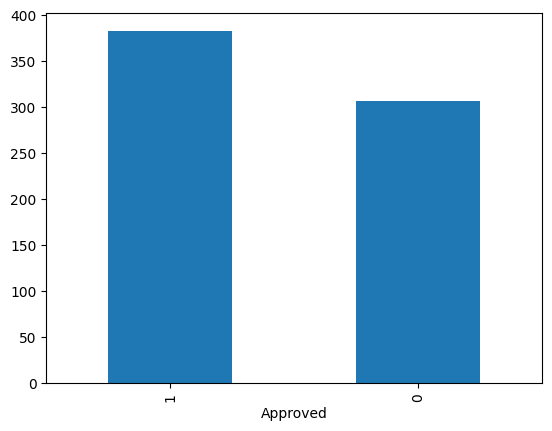

In [9]:
#to check how well our outcome column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = cc["Approved"].map(lambda x: color_wheel.get(x + 1))
print(cc.Approved.value_counts())
p=cc.Approved.value_counts().plot(kind="bar")


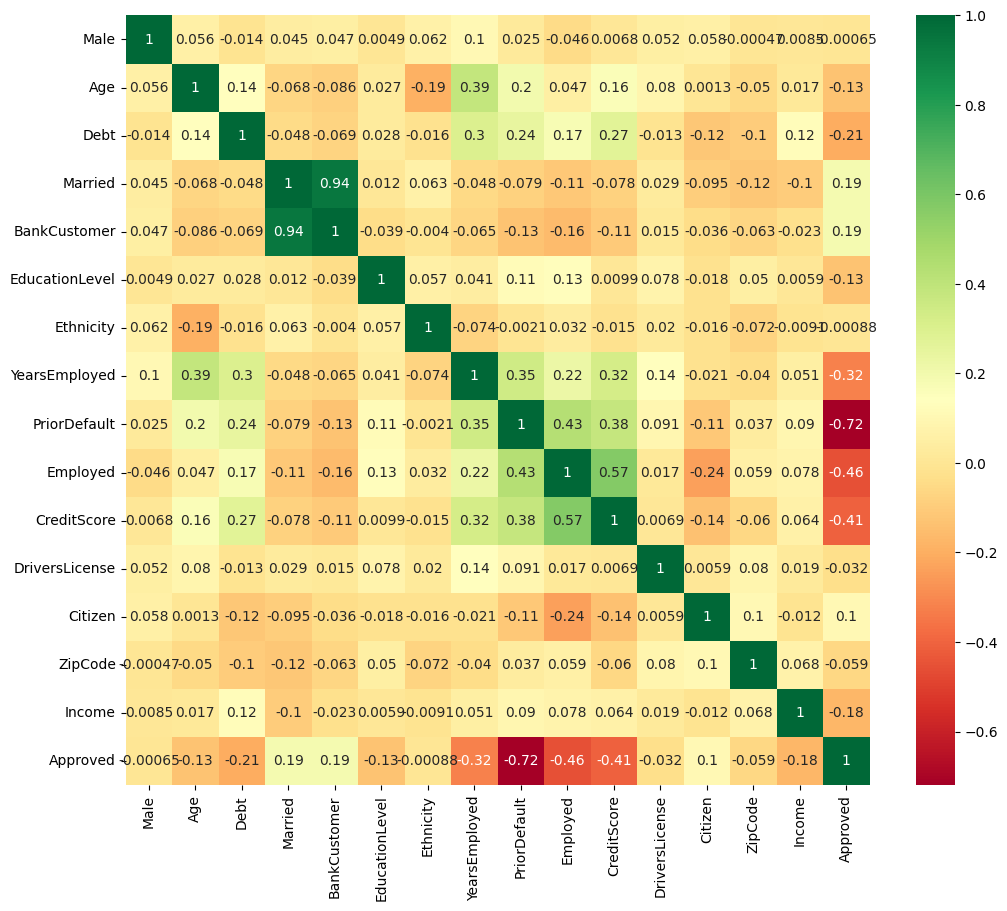

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation between all the features before cleaning
plt.figure(figsize=(12,10))
# seaborn has an easy method to showcase heatmap
p = sns.heatmap(cc.corr(), annot=True,cmap ='RdYlGn')

In [11]:
#splitting the data
X = cc.drop('Approved', axis=1)
y = cc['Approved']

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33,
                                                    random_state=7)

In [13]:
#Building the model using RandomForest
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

In [14]:
#Now after building the model let’s check the accuracy of the model on the training dataset.

rfc_train = rfc.predict(X_train)
from sklearn import metrics

print("Accuracy_Score =", format(metrics.accuracy_score(y_train, rfc_train)))

Accuracy_Score = 1.0


In [15]:
#Getting the accuracy score for Random Forest

from sklearn import metrics

predictions = rfc.predict(X_test)
print("Accuracy_Score =", format(metrics.accuracy_score(y_test, predictions)))

Accuracy_Score = 0.868421052631579


In [16]:
#Classification report and confusion matrix of the RFC model
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[ 82  14]
 [ 16 116]]
              precision    recall  f1-score   support

           0       0.84      0.85      0.85        96
           1       0.89      0.88      0.89       132

    accuracy                           0.87       228
   macro avg       0.86      0.87      0.87       228
weighted avg       0.87      0.87      0.87       228



In [17]:
#Getting feature importances

rfc.feature_importances_

array([0.01465521, 0.07438793, 0.08881065, 0.01372104, 0.01283378,
       0.06457861, 0.02507956, 0.10323268, 0.26050038, 0.05801414,
       0.10986243, 0.01318092, 0.00929138, 0.0736317 , 0.07821958])

<AxesSubplot: >

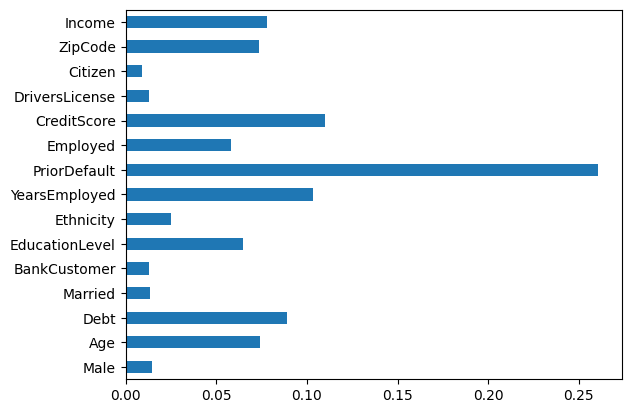

In [18]:
#Plotting feature importances

(pd.Series(rfc.feature_importances_, index=X.columns).plot(kind='barh'))

In [19]:
#saving the model
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfc)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(X_test)

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0])

In [20]:
cc.head()

,Male,Age,Debt,Married,BankCustomer,EducationLevel,Ethnicity,YearsEmployed,PriorDefault,Employed,CreditScore,DriversLicense,Citizen,ZipCode,Income,Approved
0,2,156,0.000,2,1,13,8,1.25,1,1,1,0,0,42,0,0
1,1,328,4.460,2,1,11,4,3.04,1,1,6,0,0,118,560,0
2,1,89,0.500,2,1,11,4,1.50,1,0,0,0,0,74,824,0
3,2,125,1.540,2,1,13,8,3.75,1,1,5,1,0,1,3,0
4,2,43,5.625,2,1,13,8,1.71,1,0,0,0,2,8,0,0


In [21]:
df1=pd.DataFrame(X)
df1.columns

Index(['Male', 'Age', 'Debt', 'Married', 'BankCustomer', 'EducationLevel',
       'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
       'DriversLicense', 'Citizen', 'ZipCode', 'Income'],
      dtype='object')

In [22]:
#predicting for row 2
# 0 is approved, 1 is not approved
rfc.predict(df1.loc[[2]])

array([0])

In [23]:
df2=pd.DataFrame(y)
df2

,Approved
0,0
1,0
2,0
3,0
4,0
...,...
685,1
686,1
687,1
688,1


In [24]:
df2.loc[[2]]

,Approved
2,0


Hence our model is performing well on test data

In [49]:
import tkinter as tk
import pyttsx3
import webbrowser



# create the main window
root = tk.Tk()
root.title('Credit Card Prediction App')
# create the first canvas

canvas1 = tk.Canvas(root, width=800, height=600)
canvas1.configure(bg='brown')
canvas1.pack()



# create the image on the canvas
canvas1.create_image(0, 0, anchor="nw")
canvas1.create_text(400, 50, text=' Credit card prediction App ', font=('Times', 35))

# create the first button
def switch_to_canvas2():
    canvas1.pack_forget()
    canvas2.pack()
    


First_page = tk.Button(root, text='Predict Status', bg='orange', font='Times', fg='white', width=20, command=switch_to_canvas2)
canvas1.create_window(400, 470, window=First_page)

# create an "About Us" button
def about_us():
    friend = pyttsx3.init()
    friend.say("I am Ikhlias And i along with the team at cleavered and avishek Sir created this app to help people predict their credit card status. ")
    friend.runAndWait()

About_us_button = tk.Button(root, text='About Us', bg='gray', font='Times', fg='white', width=10, command=about_us)
canvas1.create_window(400, 570, window=About_us_button)


# create the second canvas
canvas2 = tk.Canvas(root, width=400, height=600)
canvas2.configure(bg='wheat')


Details_label = tk.Label(canvas2, text=' Please enter your details ', bg='wheat', font='Times', fg='peru')
canvas2.create_window(200, 50, window=Details_label)

label7 = tk.Label(root, text=' Male : ')
canvas2.create_window(100, 400, window=label7)
entry7 = tk.Entry (root)

#create 7th entry box
canvas2.create_window(270, 400, window=entry7)
label7.configure(bg='wheat', font= 'Times', fg='peru')#

# Age and input box
label1 = tk.Label(canvas2, text=' Age : ', bg='wheat', font='Times', fg='peru')
canvas2.create_window(100, 100, window=label1)
entry1 = tk.Entry(canvas2)
canvas2.create_window(270, 100, window=entry1)

# Married and input box
label2 = tk.Label(canvas2, text=' Married (): ', bg='wheat', font='Times', fg='peru')
canvas2.create_window(100, 150, window=label2)
entry2 = tk.Entry(canvas2)
canvas2.create_window(270, 150, window=entry2)


#married_var = tk.IntVar()
#married_var.set(1)  # Set the default value
#married_yes_radio = tk.Radiobutton(root, text="Married", variable=married_var, value=1, bg='wheat', font='Times', fg='peru')
#canvas2.create_window(270, 500, window=married_yes_radio)
#married_no_window = tk.Radiobutton(root, text="Not Married", variable=married_var, value=2, bg='wheat', font='Times', fg='peru')
#canvas2.create_window(350, 500, window=married_no_radio)

#tk.Radiobutton(root, text="Not Married", variable=male_var, value=1, bg='wheat', font='Times', fg='peru')
#canvas2.create_window(270, 150, window**=married_no)
#male_radio2 = tk.Radiobutton(root, text="Married", variable=male_var, value=2, bg='wheat', font='Times', fg='peru')
#canvas2.create_window(350, 150, window=married_yes)


# Bank Customer and input box
label3 = tk.Label(root, text=' BankCustomer : ')
canvas2.create_window(100, 200, window=label3)
entry3 = tk.Entry (root)
#create 3rd entry box
canvas2.create_window(270, 200, window=entry3)
label3.configure(bg='wheat', font= 'Times', fg='peru')

# Education Level and input box
label4 = tk.Label(root, text=' EducationLevel : ')
canvas2.create_window(100, 250, window=label4)
entry4 = tk.Entry (root)
#create 4th entry box
canvas2.create_window(270, 250, window=entry4)
label4.configure(bg='wheat', font= 'Times', fg='peru')

# Enthnicity and input box
label5 = tk.Label(root, text=' Ethnicity : ')
canvas2.create_window(100, 300, window=label5)
entry5 = tk.Entry (root)
#create 5th entry box
canvas2.create_window(270, 300, window=entry5)
label5.configure(bg='wheat', font= 'Times', fg='peru')


# Years Employed and input box
label6 = tk.Label(root, text=' YearsEmployed : ')
canvas2.create_window(100, 350, window=label6)
entry6 = tk.Entry (root)
#create 6th entry box
canvas2.create_window(270, 350, window=entry6)
label6.configure(bg='wheat', font= 'Times', fg='peru')

# Debt and input box
label7 = tk.Label(root, text=' Debt : ')
canvas2.create_window(100, 400, window=label7)
entry7 = tk.Entry (root)
#create 7th entry box
canvas2.create_window(270, 400, window=entry7)
label7.configure(bg='wheat', font= 'Times', fg='peru')


# Debt and input box
label8 = tk.Label(root, text=' PriorDefault : ')
canvas2.create_window(100, 450, window=label8)
entry8 = tk.Entry (root)
#create 8th entry box
canvas2.create_window(270, 450, window=entry8)
label8.configure(bg='wheat', font= 'Times', fg='peru')


# Male and Input box
label9 = tk.Label(root, text=' Gender : ')
canvas2.create_window(100, 500, window=label9)
entry9 = tk.Entry (root)
#create 8th entry box
canvas2.create_window(270, 500, window=entry9)
label9.configure(bg='wheat', font= 'Times', fg='peru')

# Employed and input box
label10 = tk.Label(root, text=' Employed : ')
canvas2.create_window(100, 550, window=label10)
entry10 = tk.Entry (root)
#create 10th entry box
canvas2.create_window(270, 550, window=entry10)
label10.configure(bg='wheat', font= 'Times', fg='peru')

# Credit Score and input box
label11 = tk.Label(root, text=' Credit Score : ')
canvas2.create_window(100, 600, window=label11)
entry11 = tk.Entry (root)
#create 11th entry box
canvas2.create_window(270, 600, window=entry11)
label11.configure(bg='wheat', font= 'Times', fg='peru')

# Driver's License and input box
label12 = tk.Label(root, text=' Drivers License : ')
canvas2.create_window(100, 650, window=label12)
entry12 = tk.Entry (root)
#create 12th entry box
canvas2.create_window(270, 650, window=entry12)
label12.configure(bg='wheat', font= 'Times', fg='peru')

# Citizen and input box
label13 = tk.Label(root, text=' Citizen : ')
canvas2.create_window(100, 700, window=label13)
entry13 = tk.Entry (root)
#create 13th entry box
canvas2.create_window(270, 700, window=entry13)
label13.configure(bg='wheat', font= 'Times', fg='peru')

# Zipcode and input box
label14 = tk.Label(root, text=' Zipcode : ')
canvas2.create_window(100, 750, window=label14)
entry14 = tk.Entry (root)
#create 14th entry box
canvas2.create_window(270, 750, window=entry14)
label14.configure(bg='wheat', font= 'Times', fg='peru')

# Income and input box
label15 = tk.Label(root, text=' Income : ')
canvas2.create_window(100, 800, window=label15)
entry15 = tk.Entry (root)
#create 8th entry box
canvas2.create_window(270, 800, window=entry15)
label15.configure(bg='wheat', font= 'Times', fg='peru')

def values():
    age = float(entry1.get())
    married = float(entry2.get())
    bankcustomer = float(entry3.get())
    educationlevel = float(entry4.get())
    ethinicity = float(entry5.get())
    yearsemployed = float(entry6.get())
    debt = float(entry7.get())
    priordefault = float(entry8.get())
    male = float(entry9.get())
    employed = float(entry10.get())
    creditscore = float(entry11.get())
    license = float(entry12.get())
    citizen = float(entry13.get())
    zipcode = float(entry14.get())
    income = float(entry15.get())
    predict = rfc.predict([[age,married,bankcustomer,educationlevel,ethinicity,yearsemployed,debt,priordefault,male,
                           employed,creditscore,license,citizen,zipcode,income]])
    if predict == 0:
        label_prediction = tk.Label(root,text = "Approved", bg = "Orange", )
        canvas2.create_window(270,850, window = label_prediction)
    else:
        label_prediction = tk.Label(root, text = "Not Approved", bg = "Green")
        canvas2.create_window(270,850, window = label_prediction)

def switch_to_canvas1():
    canvas2.pack_forget()
    canvas1.pack()


back_button = tk.Button(canvas2, text='Back', bg='orange', font='Times', fg='white', width=0, command=switch_to_canvas1)
canvas2.create_window(30, 30, window=back_button)


button1 = tk.Button (root, text='Predict',command=values, bg='orange')
canvas2.create_window(400, 450)
button1.pack()


# show the first canvas
root.mainloop()













In [41]:
#key
'''
label2 = tk.Label(canvas2, text='(0-Single),(1-In relationship),(2-Married),(3-Married with Children)', bg='wheat', font='Times', fg='peru')
canvas2.create_window(400, 170, window=label2)
label3 = tk.Label(root, text='(0-Not a customer),(1-New customer(less than 5 years)),(2-customer for 5 years or more),(3-Customer for 10 years or more)', bg='wheat', font='Times', fg='peru')
canvas2.create_window(400, 250, window=label3)
list_education1='(0-5th to 8th grade),(1-9th grade),(2-10th grade),(3-11th grade),(4-12th grade),(5-highschool dimploma)'
list_education2='(6-1st year college),(7-2nd year college),(8-3rd year college),(9-final year college),(10-postgraduation)'
list_education3='(11-Phd level),(12-internship),(13-IGCSE),(14-A levels)'
label4 = tk.Label(root, text=list_education1, bg='wheat', font='Times', fg='peru')
canvas2.create_window(400, 330, window=label4)
label4 = tk.Label(root, text=list_education2, bg='wheat', font='Times', fg='peru')
canvas2.create_window(400, 350, window=label4)
label4 = tk.Label(root, text=list_education3, bg='wheat', font='Times', fg='peru')
canvas2.create_window(400, 370, window=label4)
label5 = tk.Label(root, text='(0-Latin American),(1-South American),(2-South Asian),(3-Middle Eastern),(4-Meditaranean)', bg='wheat', font='Times', fg='peru')
canvas2.create_window(400, 450, window=label5)
label5 = tk.Label(root, text='(5-Germanic),(6-East Asian),(7-Subharan African),(8-Southeast Asian),(9-Slavic)', bg='wheat', font='Times', fg='peru')
canvas2.create_window(400, 470, window=label5)
label7 = tk.Label(root, text='(0-Male),(1-Female),(2-Other/Prefer not to say)')
canvas2.create_window(400, 610, window=label7)

'''

"\nlabel2 = tk.Label(canvas2, text='(0-Single),(1-In relationship),(2-Married),(3-Married with Children)', bg='wheat', font='Times', fg='peru')\ncanvas2.create_window(400, 170, window=label2)\nlabel3 = tk.Label(root, text='(0-Not a customer),(1-New customer(less than 5 years)),(2-customer for 5 years or more),(3-Customer for 10 years or more)', bg='wheat', font='Times', fg='peru')\ncanvas2.create_window(400, 250, window=label3)\nlist_education1='(0-5th to 8th grade),(1-9th grade),(2-10th grade),(3-11th grade),(4-12th grade),(5-highschool dimploma)'\nlist_education2='(6-1st year college),(7-2nd year college),(8-3rd year college),(9-final year college),(10-postgraduation)'\nlist_education3='(11-Phd level),(12-internship),(13-IGCSE),(14-A levels)'\nlabel4 = tk.Label(root, text=list_education1, bg='wheat', font='Times', fg='peru')\ncanvas2.create_window(400, 330, window=label4)\nlabel4 = tk.Label(root, text=list_education2, bg='wheat', font='Times', fg='peru')\ncanvas2.create_window(400, 3

In [27]:
#details to include in video
'''
Name :
Age:
Grade:
Hobbies :
country:
Project name:
'''

'\nName :\nAge:\nGrade:\nHobbies :\ncountry:\nProject name:\n'